In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [63]:
data = pd.read_csv('Cust_Segmentation.csv')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [64]:
data['Age'].describe()

count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64

In [65]:
data.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [66]:
featureset = data[['Age', 'Edu', 'Years Employed', 'Income', 'DebtIncomeRatio']]

In [67]:
from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler().fit(featureset)
x = scal.fit_transform(featureset)
x

array([[0.58333333, 0.25      , 0.18181818, 0.01385681, 0.15048544],
       [0.75      , 0.        , 0.78787879, 0.20092379, 0.30825243],
       [0.36111111, 0.25      , 0.3030303 , 0.10161663, 0.50485437],
       ...,
       [0.13888889, 0.75      , 0.        , 0.01154734, 0.80825243],
       [0.33333333, 0.        , 0.36363636, 0.03464203, 0.06796117],
       [0.88888889, 0.        , 0.48484848, 0.11778291, 0.20631068]])

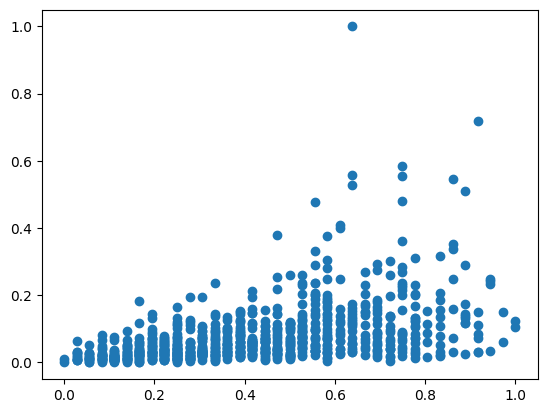

In [68]:
plt.scatter(x[:,0], x[:,3])

In [69]:
model = KMeans(n_clusters=3, init='k-means++', n_init=13)
model.fit(x)

KMeans(n_clusters=3, n_init=13)

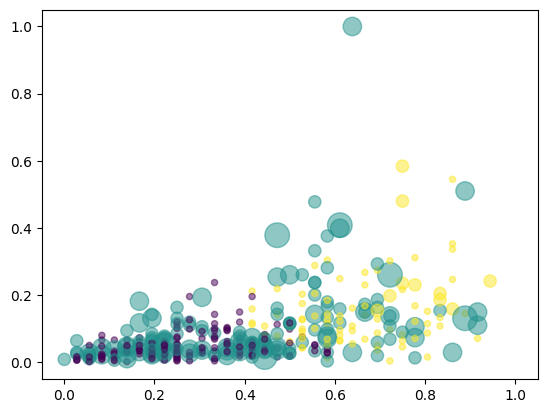

In [72]:
area = (np.pi*x[:,1]**2)*100
plt.scatter(x[:,0], x[:,3], c = model.labels_ , alpha=0.5, s = area)